## **Functions**

In [1]:
import shutil
from collections.abc import Sequence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show() 

def to_sequences(seq_size, data):
    x = []
    y = []
    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data[i:(i+seq_size)]
        after_window = data[i+seq_size]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

## **Loading Data**

In [2]:
import os
import io
import requests
import sklearn
from aeon.datasets import load_classification
X, y, meta_data = load_classification("Tiselac")
print(" Shape of X = ", X.shape)
print(" Shape of y = ", y.shape)
print(" Meta data = ", meta_data)

 Shape of X =  (99687, 10, 23)
 Shape of y =  (99687,)
 Meta data =  {'problemname': 'tiselac', 'timestamps': False, 'missing': False, 'univariate': False, 'equallength': True, 'classlabel': True, 'targetlabel': False, 'class_values': ['1', '2', '3', '4', '5', '6', '7', '8', '9']}


## **Splitting Data to Train and Test**

In [3]:
X_train, y_train = load_classification(
    "Tiselac", extract_path="./Temp/", split="TRAIN", return_metadata=False
)
X_test, y_test = load_classification(
    "Tiselac", extract_path="./Temp/", split="test", return_metadata=False
)
print("Train shape = ", X_train.shape)
print("Test shape = ", X_test.shape)
print("Train shape = ", y_train.shape)
print("Test shape = ", y_test.shape)

Train shape =  (81714, 10, 23)
Test shape =  (17973, 10, 23)
Train shape =  (81714,)
Test shape =  (17973,)


In [4]:
X

array([[[  26.,   26.,   26., ...,    9.,    9.,    9.],
        [  26.,   26.,   26., ...,   16.,   16.,   16.],
        [  35.,   35.,   35., ...,   61.,   61.,   61.],
        ...,
        [ 282.,  282.,  282., ...,  766.,  766.,  766.],
        [ 132.,  132.,  132., ..., -204., -204., -204.],
        [ 148.,  148.,  148., ...,  469.,  469.,  469.]],

       [[  47.,   47.,   47., ...,   62.,   62.,   62.],
        [  52.,   52.,   52., ...,   70.,   70.,   70.],
        [  80.,   80.,   80., ...,   89.,   89.,   89.],
        ...,
        [ 661.,  661.,  661., ...,  351.,  351.,  351.],
        [-320., -320., -320., ...,  -40.,  -40.,  -40.],
        [ 408.,  408.,  408., ...,  372.,  372.,  372.]],

       [[   0.,    0.,    0., ...,   34.,   33.,   33.],
        [   0.,    0.,    0., ...,   37.,   36.,   36.],
        [  35.,   35.,   35., ...,   70.,   69.,   69.],
        ...,
        [ 949.,  949.,  949., ...,  720.,  733.,  733.],
        [-347., -347., -347., ..., -317., -32

In [5]:
X.dtype

dtype('float64')

In [6]:
y

array(['6', '1', '6', ..., '3', '4', '5'], dtype='<U1')

In [7]:
first = X_train[1]

pd.DataFrame(first)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,47.0,47.0,47.0,47.0,47.0,25.0,13.0,20.0,27.0,34.0,...,61.0,65.0,67.0,56.0,60.0,62.0,62.0,62.0,62.0,62.0
1,52.0,52.0,52.0,52.0,52.0,23.0,6.0,15.0,24.0,33.0,...,68.0,70.0,73.0,69.0,69.0,70.0,70.0,70.0,70.0,70.0
2,80.0,80.0,80.0,80.0,80.0,55.0,39.0,43.0,47.0,51.0,...,89.0,92.0,92.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0
3,68.0,68.0,68.0,68.0,68.0,37.0,17.0,26.0,34.0,43.0,...,96.0,105.0,113.0,107.0,106.0,106.0,106.0,106.0,106.0,106.0
4,334.0,334.0,334.0,334.0,334.0,394.0,412.0,361.0,311.0,260.0,...,234.0,246.0,254.0,219.0,220.0,221.0,221.0,221.0,221.0,221.0
5,172.0,172.0,172.0,172.0,172.0,164.0,153.0,144.0,136.0,128.0,...,206.0,245.0,265.0,217.0,208.0,204.0,204.0,204.0,204.0,204.0
6,99.0,99.0,99.0,99.0,99.0,85.0,73.0,71.0,69.0,67.0,...,153.0,210.0,181.0,157.0,147.0,143.0,143.0,143.0,143.0,143.0
7,661.0,661.0,661.0,661.0,661.0,828.0,920.0,865.0,802.0,716.0,...,418.0,401.0,384.0,343.0,349.0,351.0,351.0,351.0,351.0,351.0
8,-320.0,-320.0,-320.0,-320.0,-320.0,-412.0,-458.0,-429.0,-391.0,-340.0,...,-63.0,-2.0,21.0,-4.0,-28.0,-40.0,-40.0,-40.0,-40.0,-40.0
9,408.0,408.0,408.0,408.0,408.0,441.0,447.0,399.0,353.0,308.0,...,382.0,439.0,445.0,383.0,374.0,372.0,372.0,372.0,372.0,372.0


In [8]:
print(X_train.shape)

(81714, 10, 23)


## **Normalization**

In [9]:
# convert to float32 for normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')


In [10]:
# normalize the data values to the range [0, 1]
X_train /= 255
X_test /= 255

## **convert Y to one hot-encoded Format**

In [12]:
from sklearn import preprocessing

y_train_2 = pd.get_dummies(y_train)
y_test_2 = pd.get_dummies(y_test)

In [13]:
y_train_2

,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
81709,False,True,False,False,False,False,False,False,False
81710,True,False,False,False,False,False,False,False,False
81711,False,False,False,False,False,False,True,False,False
81712,False,False,False,False,False,False,True,False,False


In [14]:
y_train_2.shape, y_test_2.shape

((81714, 9), (17973, 9))

## **Building LSTM Classification Model (Relu & Adam)**

Build model...
Train...
Epoch 1/100


2023-10-15 17:32:43.132837: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2554/2554 - 46s - loss: 0.8254 - accuracy: 0.7355 - val_loss: 0.6335 - val_accuracy: 0.8009 - 46s/epoch - 18ms/step
Epoch 2/100
2554/2554 - 43s - loss: 0.6632 - accuracy: 0.7859 - val_loss: 0.5734 - val_accuracy: 0.8162 - 43s/epoch - 17ms/step
Epoch 3/100
2554/2554 - 44s - loss: 0.6170 - accuracy: 0.8003 - val_loss: 0.5254 - val_accuracy: 0.8311 - 44s/epoch - 17ms/step
Epoch 4/100
2554/2554 - 44s - loss: 0.5840 - accuracy: 0.8101 - val_loss: 0.5015 - val_accuracy: 0.8393 - 44s/epoch - 17ms/step
Epoch 5/100
2554/2554 - 44s - loss: 0.5598 - accuracy: 0.8179 - val_loss: 0.5033 - val_accuracy: 0.8433 - 44s/epoch - 17ms/step
Epoch 6/100
2554/2554 - 44s - loss: 0.5414 - accuracy: 0.8242 - val_loss: 0.4708 - val_accuracy: 0.8499 - 44s/epoch - 17ms/step
Epoch 7/100
2554/2554 - 44s - loss: 0.5294 - accuracy: 0.8269 - val_loss: 0.4620 - val_accuracy: 0.8523 - 44s/epoch - 17ms/step
Epoch 8/100
2554/2554 - 44s - loss: 0.5142 - accuracy: 0.8316 - val_loss: 0.4462 - val_accuracy: 0.8561 - 44s/epoch 

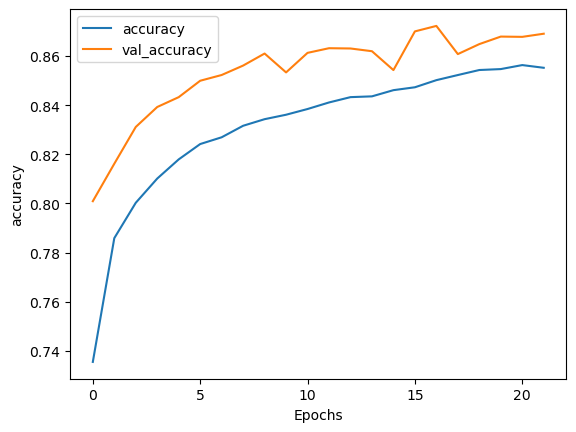

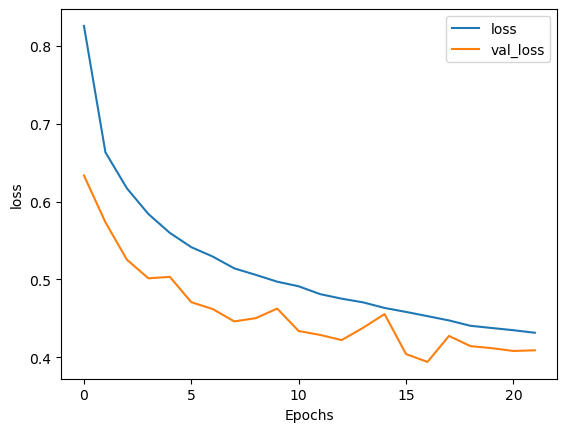

562/562 [==============================] - 2s 3ms/step
Accuracy: 0.8722528236799644
Averaged F1: 0.8694071225628272
Precision score: 0.8695025112187371
Recall score: 0.8722528236799644
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4000
           1       0.65      0.49      0.56       647
           2       0.88      0.90      0.89      4000
           3       0.90      0.88      0.89      3398
           4       0.90      0.95      0.93      2588
           5       0.70      0.83      0.76      1136
           6       0.94      0.89      0.91      1531
           7       0.35      0.11      0.17       154
           8       0.81      0.80      0.81       519

    accuracy                           0.87     17973
   macro avg       0.78      0.75      0.76     17973
weighted avg       0.87      0.87      0.87     17973



In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import metrics

print('Build model...')
model = Sequential()

#Like CNN,  input_shape is the shape of each sample

model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, input_shape=(10, 23), return_sequences = True))
model.add(LSTM(64, dropout = 0.1, recurrent_dropout = 0.1, input_shape = (10, 23)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(9, activation='softmax'))


# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,  beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False),
              metrics=['accuracy'])


monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)

print('Train...')
history = model.fit(X_train, y_train_2,validation_data=(X_test,y_test_2),verbose=2, epochs=100, callbacks=[monitor,checkpointer])


model.load_weights('best_weights_NN.hdf5')  

# evaluate() computes the loss and accuracy
score = model.evaluate(X_test, y_test_2, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

y_true = np.argmax(y_test_2,axis=1)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(score))

score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(score))
        
print(metrics.classification_report(y_true, pred))


## **Building LSTM Classification Model (tanh & Adam)**

Build model...


Train...
Epoch 1/100
2554/2554 - 46s - loss: 0.8112 - accuracy: 0.7413 - val_loss: 0.6070 - val_accuracy: 0.8062 - 46s/epoch - 18ms/step
Epoch 2/100
2554/2554 - 44s - loss: 0.6517 - accuracy: 0.7896 - val_loss: 0.5540 - val_accuracy: 0.8225 - 44s/epoch - 17ms/step
Epoch 3/100
2554/2554 - 44s - loss: 0.5990 - accuracy: 0.8057 - val_loss: 0.5168 - val_accuracy: 0.8349 - 44s/epoch - 17ms/step
Epoch 4/100
2554/2554 - 44s - loss: 0.5684 - accuracy: 0.8137 - val_loss: 0.4709 - val_accuracy: 0.8488 - 44s/epoch - 17ms/step
Epoch 5/100
2554/2554 - 44s - loss: 0.5430 - accuracy: 0.8223 - val_loss: 0.4901 - val_accuracy: 0.8407 - 44s/epoch - 17ms/step
Epoch 6/100
2554/2554 - 44s - loss: 0.5288 - accuracy: 0.8268 - val_loss: 0.4433 - val_accuracy: 0.8558 - 44s/epoch - 17ms/step
Epoch 7/100
2554/2554 - 44s - loss: 0.5121 - accuracy: 0.8321 - val_loss: 0.4384 - val_accuracy: 0.8595 - 44s/epoch - 17ms/step
Epoch 8/100
2554/2554 - 44s - loss: 0.5028 - accuracy: 0.8339 - val_loss: 0.4285 - val_accuracy

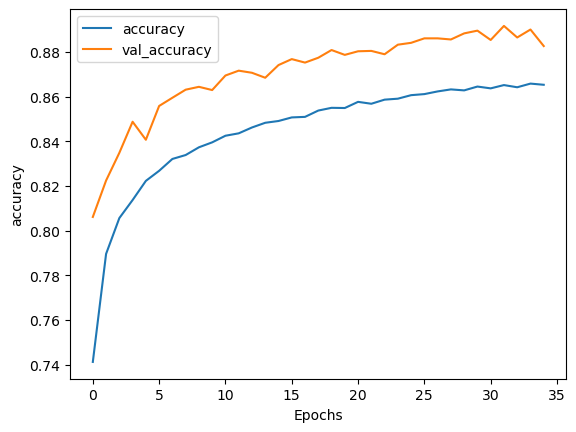

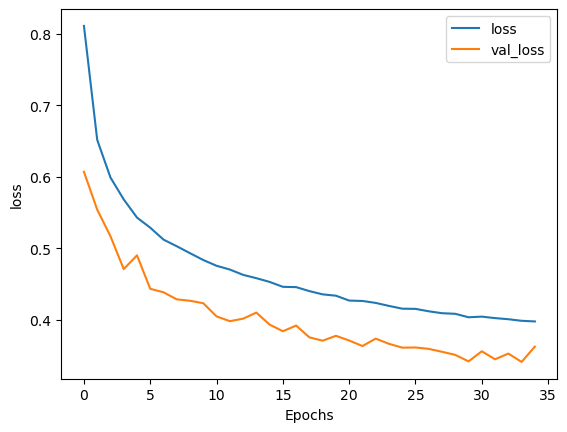

562/562 [==============================] - 2s 3ms/step
Accuracy: 0.890057308184499
Averaged F1: 0.8882726786500947
Precision score: 0.8887113600885543
Recall score: 0.890057308184499
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4000
           1       0.66      0.55      0.60       647
           2       0.89      0.91      0.90      4000
           3       0.90      0.93      0.92      3398
           4       0.94      0.95      0.94      2588
           5       0.74      0.85      0.79      1136
           6       0.94      0.93      0.93      1531
           7       0.58      0.27      0.37       154
           8       0.87      0.76      0.81       519

    accuracy                           0.89     17973
   macro avg       0.83      0.78      0.80     17973
weighted avg       0.89      0.89      0.89     17973



In [16]:

print('Build model...')
model = Sequential()

#Like CNN,  input_shape is the shape of each sample

model.add(LSTM(128, activation='tanh', dropout=0.2, recurrent_dropout=0.2, input_shape=(10, 23), return_sequences = True))
model.add(LSTM(64, dropout = 0.1, recurrent_dropout = 0.1, input_shape = (10, 23)))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(9, activation='softmax'))


# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,  beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False),
              metrics=['accuracy'])


monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)

print('Train...')
history = model.fit(X_train, y_train_2,validation_data=(X_test,y_test_2),verbose=2, epochs=100, callbacks=[monitor,checkpointer])


model.load_weights('best_weights_NN.hdf5')  


# evaluate() computes the loss and accuracy
score = model.evaluate(X_test, y_test_2, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

y_true = np.argmax(y_test_2,axis=1)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(score))

score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(score))
        
print(metrics.classification_report(y_true, pred))


## **Building LSTM Classification Model (relu & SGD)**

Build model...


Train...
Epoch 1/100
2554/2554 - 45s - loss: 2.1725 - accuracy: 0.1228 - val_loss: 2.1333 - val_accuracy: 0.2323 - 45s/epoch - 18ms/step
Epoch 2/100
2554/2554 - 43s - loss: 2.1205 - accuracy: 0.1907 - val_loss: 2.0790 - val_accuracy: 0.2225 - 43s/epoch - 17ms/step
Epoch 3/100
2554/2554 - 42s - loss: 2.0800 - accuracy: 0.1952 - val_loss: 2.0348 - val_accuracy: 0.2221 - 42s/epoch - 16ms/step
Epoch 4/100
2554/2554 - 42s - loss: 2.0456 - accuracy: 0.1954 - val_loss: 1.9957 - val_accuracy: 0.2220 - 42s/epoch - 16ms/step
Epoch 5/100
2554/2554 - 42s - loss: 2.0161 - accuracy: 0.1952 - val_loss: 1.9619 - val_accuracy: 0.2217 - 42s/epoch - 17ms/step
Epoch 6/100
2554/2554 - 42s - loss: 1.9908 - accuracy: 0.1950 - val_loss: 1.9332 - val_accuracy: 0.2216 - 42s/epoch - 17ms/step
Epoch 7/100
2554/2554 - 42s - loss: 1.9690 - accuracy: 0.1974 - val_loss: 1.9086 - val_accuracy: 0.2248 - 42s/epoch - 16ms/step
Epoch 8/100
2554/2554 - 42s - loss: 1.9501 - accuracy: 0.2087 - val_loss: 1.8874 - val_accuracy

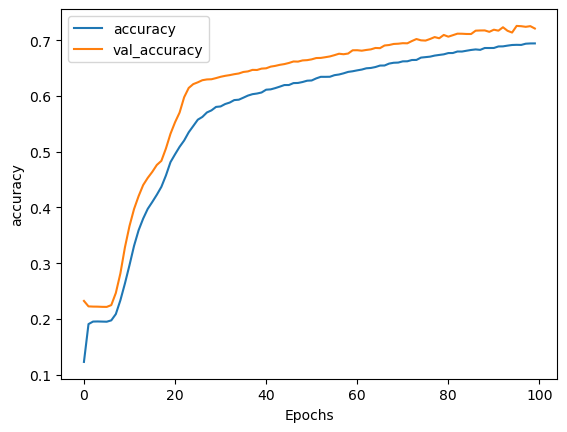

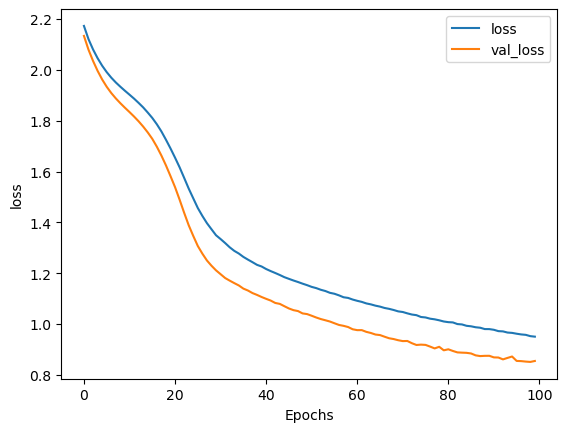

562/562 [==============================] - 2s 2ms/step
Accuracy: 0.7254214655316308
Averaged F1: 0.6914092732229066
Precision score: 0.7031082022339157
Recall score: 0.7254214655316308
              precision    recall  f1-score   support

           0       0.70      0.89      0.78      4000
           1       0.00      0.00      0.00       647
           2       0.81      0.84      0.82      4000
           3       0.75      0.77      0.76      3398
           4       0.74      0.76      0.75      2588
           5       0.64      0.28      0.39      1136
           6       0.60      0.81      0.69      1531
           7       0.00      0.00      0.00       154
           8       1.00      0.00      0.01       519

    accuracy                           0.73     17973
   macro avg       0.58      0.48      0.47     17973
weighted avg       0.70      0.73      0.69     17973



/Users/skarry/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/skarry/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/skarry/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len

In [17]:

print('Build model...')
model = Sequential()

#Like CNN,  input_shape is the shape of each sample

model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, input_shape=(10, 23), return_sequences = True))
model.add(LSTM(64, dropout = 0.1, recurrent_dropout = 0.1, input_shape = (10, 23)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(9, activation='softmax'))


# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, nesterov=True),
              metrics=['accuracy'])


monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)

print('Train...')
history = model.fit(X_train, y_train_2,validation_data=(X_test,y_test_2),verbose=2, epochs=100, callbacks=[monitor,checkpointer])


model.load_weights('best_weights_NN.hdf5')  


# evaluate() computes the loss and accuracy
score = model.evaluate(X_test, y_test_2, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

y_true = np.argmax(y_test_2,axis=1)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(score))

score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(score))
        
print(metrics.classification_report(y_true, pred))


## **Building LSTM Classification Model (tanh & SGD)**

Build model...


Train...
Epoch 1/100
2554/2554 - 45s - loss: 2.1562 - accuracy: 0.1629 - val_loss: 2.0820 - val_accuracy: 0.2351 - 45s/epoch - 17ms/step
Epoch 2/100
2554/2554 - 42s - loss: 2.0697 - accuracy: 0.2053 - val_loss: 2.0057 - val_accuracy: 0.2323 - 42s/epoch - 17ms/step
Epoch 3/100
2554/2554 - 42s - loss: 2.0213 - accuracy: 0.2092 - val_loss: 1.9607 - val_accuracy: 0.2361 - 42s/epoch - 17ms/step
Epoch 4/100
2554/2554 - 43s - loss: 1.9910 - accuracy: 0.2168 - val_loss: 1.9311 - val_accuracy: 0.2443 - 43s/epoch - 17ms/step
Epoch 5/100
2554/2554 - 42s - loss: 1.9700 - accuracy: 0.2296 - val_loss: 1.9097 - val_accuracy: 0.2571 - 42s/epoch - 16ms/step
Epoch 6/100
2554/2554 - 42s - loss: 1.9534 - accuracy: 0.2531 - val_loss: 1.8930 - val_accuracy: 0.2720 - 42s/epoch - 17ms/step
Epoch 7/100
2554/2554 - 42s - loss: 1.9405 - accuracy: 0.2783 - val_loss: 1.8790 - val_accuracy: 0.2917 - 42s/epoch - 17ms/step
Epoch 8/100
2554/2554 - 43s - loss: 1.9287 - accuracy: 0.3052 - val_loss: 1.8664 - val_accuracy

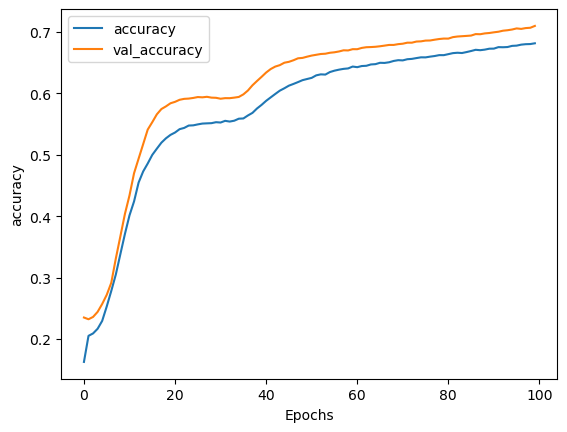

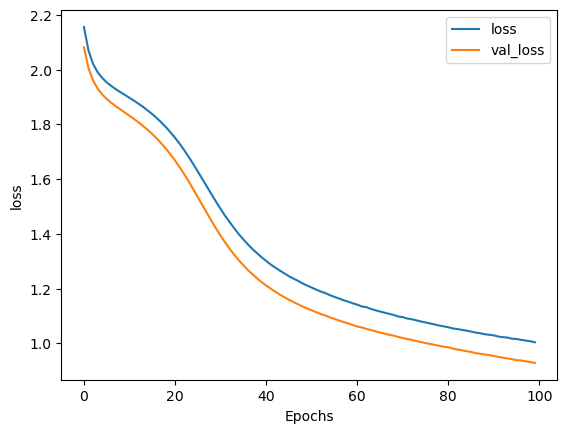

562/562 [==============================] - 2s 2ms/step
Accuracy: 0.7095643465197796
Averaged F1: 0.6729980450791638
Precision score: 0.6553713839646492
Recall score: 0.7095643465197796
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      4000
           1       0.00      0.00      0.00       647
           2       0.75      0.86      0.80      4000
           3       0.73      0.77      0.75      3398
           4       0.75      0.75      0.75      2588
           5       0.53      0.17      0.26      1136
           6       0.52      0.77      0.62      1531
           7       0.00      0.00      0.00       154
           8       0.00      0.00      0.00       519

    accuracy                           0.71     17973
   macro avg       0.45      0.46      0.44     17973
weighted avg       0.66      0.71      0.67     17973



/Users/skarry/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/skarry/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/skarry/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len

In [18]:

print('Build model...')
model = Sequential()

#Like CNN,  input_shape is the shape of each sample

model.add(LSTM(128, activation='tanh', dropout=0.2, recurrent_dropout=0.2, input_shape=(10, 23), return_sequences = True))
model.add(LSTM(64, dropout = 0.1, recurrent_dropout = 0.1, input_shape = (10, 23)))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(9, activation='softmax'))


# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, nesterov=True),
              metrics=['accuracy'])


monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)

print('Train...')
history = model.fit(X_train, y_train_2,validation_data=(X_test,y_test_2),verbose=2, epochs=100, callbacks=[monitor,checkpointer])


model.load_weights('best_weights_NN.hdf5')  


# evaluate() computes the loss and accuracy
score = model.evaluate(X_test, y_test_2, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

y_true = np.argmax(y_test_2,axis=1)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(score))

score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(score))
        
print(metrics.classification_report(y_true, pred))
